# EDA on Super Store (United States) Data

<img src="https://i.ytimg.com/vi/-YJO5DxmY1U/hqdefault.jpg">

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Description of the Datasets](#section301)<br>
  - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br>
4. [Data Preprocessing](#section4)<br>
  - 4.1 [Data Preprocessing](#section401)<br>
  - 4.2 [Pandas Profiling after Data Preprocessing](#section402)<br>
5. [Exploratory Data Analysis](#section5)<br>
  - 5.1 [**Analysis based on Outlet metrics**](#section501)<br>

6. [Conclusion](#section6)
  - 6.1 [Actionable Insights](#section601)

<a id=section1></a>
## 1. Problem Statement

<a id=section2></a>
## 2. Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id=section3></a>
## 3. Loading Data

In [2]:
df_store = pd.read_csv('SampleSuperstore.csv')

<a id=section301></a>
### Description of the Dataset

In [3]:
df_store.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [4]:
df_store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


- ```info``` function gives us the following insights into the df_store dataframe:

  - There are a total of **9994 samples (rows)** and **13 columns** in the dataframe.
  
  - There are **5 columns** with a **numeric** datatype and **8 columns** with an **object** datatype.
  
  - There are **0 missing** values in the data.

In [6]:
import pandas_profiling 

In [7]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html

profile = df_store.profile_report(title='Pandas Profiling_SuperStore')
profile.to_file(output_file="profiling_SuperStore.html")


**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of observations: 9994
- Missing cells: 0 (0.0%)
- Duplicate rows: 17 (0.2%)

<br>

- **Country** has **constant value "United States"**.


- **Dataset has 17 (0.2%) duplicate rows**.


- **Region** is **highly correlated** with **State**.


- **Sub-Category** is **highly correlated** with **Category**.


- **Ship Mode** has data divided into **4** distinct values:
    - Standard Class, Second Class,First Class, Same Day
 			
  
- **Segment** has data divided into **3** distinct values:
    - Consumer, Corporate, Home Office
  
- **Category** has data divided into **3** distinct categories:
    - Office Supplies, Furniture, Technology
  
- **Sub-Category** has data divided into **17** distinct values:

  
- All the **remaining columns** can be studied in the same way.

<a id=section4></a>
## 4. Data Preprocessing

<a id=section401></a>
### 4.1 Data Preprocessing

Here we will perform **Data Preprocessing** on our dataset, to make the data usable for **EDA**.


- Since the column **Country** has a **constant value** for all the samples, we will drop this column.
- Also the column **Postal Code** will be **dropped** because it does not any additional insight into the data.

In [8]:
df_store.drop(['Postal Code', 'Country'], 1, inplace=True)
df_store.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [10]:
df_negative_profit = df_store[df_store['Profit']<0]
df_negative_profit

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Corporate,Bryan,Texas,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176
9921,Standard Class,Home Office,Akron,Ohio,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936
9931,Standard Class,Consumer,San Bernardino,California,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960
9937,Second Class,Corporate,Los Angeles,California,West,Furniture,Tables,71.0880,2,0.20,-1.7772


### Analysing the store data for understanding Profits and Sales based on the following groups:
1. Entire United States
2. Region-wise (Central, East, West, South)
3. State-wise

### 1. Analysis based on 'Shipping Mode' (viz. Standard, First, Second,Same Day)

### 1.1 Analysis based on 'Shipping Mode' across entire US

In [12]:
# For each ship-mode to find the Sales and Profit across entire US
for shipmode in df_store['Ship Mode'].unique():
    print('ShipMode = ', shipmode)
    print('Total Sales in US = ', df_store[df_store['Ship Mode']==shipmode].Sales.sum())
    print('Total Profit in US = ', df_store[df_store['Ship Mode']==shipmode].Profit.sum())
    print()


ShipMode =  Second Class
Total Sales in US =  459193.56940000004
Total Profit in US =  57446.63540000001

ShipMode =  Standard Class
Total Sales in US =  1358215.743
Total Profit in US =  164088.7875

ShipMode =  First Class
Total Sales in US =  351428.4229
Total Profit in US =  48969.8399

ShipMode =  Same Day
Total Sales in US =  128363.125
Total Profit in US =  15891.7589



Understanding Sales&Profit for different __'Shipping Modes'__ across United States. <br/>
Arranging the __'Shipping Mode'__ in descending order of Profit i.e. starting with the most Profitable 'Shipping Mode' and going to the least.<br/>
1. __Standard Class__ : __Highest__ Sales & Profit recorded for Standard Class Shipping Mode
2. __Second Class__ 
3. __First Class__
4. __Same Day__ : __Least__ Sales & Profit recorded for Same Day Shipping Mode

### 1.2 Analysis based on Region-wise 'Shipping Mode' 

In [13]:
# For each Ship-mode to find Region-wise Sales&Profit 
for region in df_store['Region'].unique():
    print('Region:', region)
    for shipmode in df_store['Ship Mode'].unique():
        print('ShipMode = ', shipmode)
        print('Total Sales = ', df_store[(df_store['Ship Mode']==shipmode) & (df_store['Region']==region)].Sales.sum())
        print('Total Profit in US = ', df_store[(df_store['Ship Mode']==shipmode) & (df_store['Region']==region)].Profit.sum())
        print()
    print('------------------------------------------------------------------------')

Region: South
ShipMode =  Second Class
Total Sales =  93758.61249999999
Total Profit in US =  14667.1469

ShipMode =  Standard Class
Total Sales =  227613.5535
Total Profit in US =  26952.232999999997

ShipMode =  First Class
Total Sales =  49332.566000000006
Total Profit in US =  6892.3854

ShipMode =  Same Day
Total Sales =  21017.173
Total Profit in US =  -1762.3350000000005

------------------------------------------------------------------------
Region: West
ShipMode =  Second Class
Total Sales =  145339.4275
Total Profit in US =  22877.3628

ShipMode =  Standard Class
Total Sales =  406752.79850000003
Total Profit in US =  54760.9657

ShipMode =  First Class
Total Sales =  129761.8885
Total Profit in US =  22638.1732

ShipMode =  Same Day
Total Sales =  43603.71000000001
Total Profit in US =  8141.9472000000005

------------------------------------------------------------------------
Region: Central
ShipMode =  Second Class
Total Sales =  103550.00540000001
Total Profit in US =  

Understanding __Region-wise__ (viz. Central, West, East and South) Sales&Profit performance for each __Ship_Mode__ (viz. Stardard, First, Second, Same Day)

For all Regions (viz. Central, West, East and South) arranging both Sales & Profit from highest to least earning
1. __Standard Shipping mode__ : __Maximum__ Sales & Profit across all Regions
2. __Second Shipping mode__
3. __First Shipping mode__
4. __Same Day Shipping mode__: __Minimum__ Sales & Profit across all Regions

In [14]:
df_store.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### 2. Segment-wise analysis of store data (viz. Consumer, Corporate, Home office)

### 2.1 Analysing Region-wise Sales & Profit  for each Segment

In [15]:
# For each Segment to find Region-wise Sales&Profit 
for region in df_store['Region'].unique():
    print('Region:', region)
    for segment in df_store['Segment'].unique():
        print('Segment = ', segment)
        print('Total Sales = ', df_store[(df_store['Segment']==segment) & (df_store['Region']==region)].Sales.sum())
        print('Total Profit in US = ', df_store[(df_store['Segment']==segment) & (df_store['Region']==region)].Profit.sum())
        print()
    print('------------------------------------------------------------------------')

Region: South
Segment =  Consumer
Total Sales =  195580.97100000002
Total Profit in US =  26913.5728

Segment =  Corporate
Total Sales =  121885.9325
Total Profit in US =  15215.2232

Segment =  Home Office
Total Sales =  74255.0015
Total Profit in US =  4620.6343

------------------------------------------------------------------------
Region: West
Segment =  Consumer
Total Sales =  362880.773
Total Profit in US =  57450.60400000001

Segment =  Corporate
Total Sales =  225855.2745
Total Profit in US =  34437.4299

Segment =  Home Office
Total Sales =  136721.777
Total Profit in US =  16530.415

------------------------------------------------------------------------
Region: Central
Segment =  Consumer
Total Sales =  252031.434
Total Profit in US =  8564.048099999998

Segment =  Corporate
Total Sales =  157995.8128
Total Profit in US =  18703.902000000002

Segment =  Home Office
Total Sales =  91212.644
Total Profit in US =  12438.412400000001

-----------------------------------------

Understanding __Region-wise__ (viz. Central, West, East and South) Sales&Profit performance for each 
__Segment__ of buyers (viz. Consumer, Corporate, Home office)

For all Regions (viz. Central, West, East and South) arranging both Sales & Profit from highest to least earning
1. __Consumer__ Segment: __Highest__ Sales & Profit across all Regions
2. __Corporate__ Segment
3. __Home Office__ Segment: __Least__ Sales & Profit across all Regions

For all buyer Segments (viz. Consumer, Corporate, Home office) arranging both Sales & Profit from highest to least earning
1. __West__ : Highest Sales&Profits are recorded in the West Region of US for all buyer Segments (viz. Consumer, Corporate, Home office)
2. __East__ : East Region of US records the __2nd highest__ Sales&Profits for all buyer Segments
3. __Central__ : Central Region of US records the __3rd highest__ Sales&Profits for all buyer Segments
4. __South__ : South Region of US records the __lowest__ Sales&Profits for all buyer Segments


### 2.2 Identifying Purchasing trend of different product __Categories__ (viz. Office Supplies, Furniture, Technology) by different __Segment of buyers__ (viz. Consumer, Corporate, Home office)

In [16]:
for category in df_store['Category'].unique():
    print('Product Category:', category)
    for segment in df_store['Segment'].unique():
        #print('Segment = ', segment)
        print('count in ',segment,'Segment using ',category,'is: ', df_store[(df_store['Segment']==segment) & (df_store['Category']==category)].Segment.count())
    print('------------------------------------------------------------------------')

Product Category: Furniture
count in  Consumer Segment using  Furniture is:  1113
count in  Corporate Segment using  Furniture is:  646
count in  Home Office Segment using  Furniture is:  362
------------------------------------------------------------------------
Product Category: Office Supplies
count in  Consumer Segment using  Office Supplies is:  3127
count in  Corporate Segment using  Office Supplies is:  1820
count in  Home Office Segment using  Office Supplies is:  1079
------------------------------------------------------------------------
Product Category: Technology
count in  Consumer Segment using  Technology is:  951
count in  Corporate Segment using  Technology is:  554
count in  Home Office Segment using  Technology is:  342
------------------------------------------------------------------------


Text(0.5, 0, 'Office Supplies')

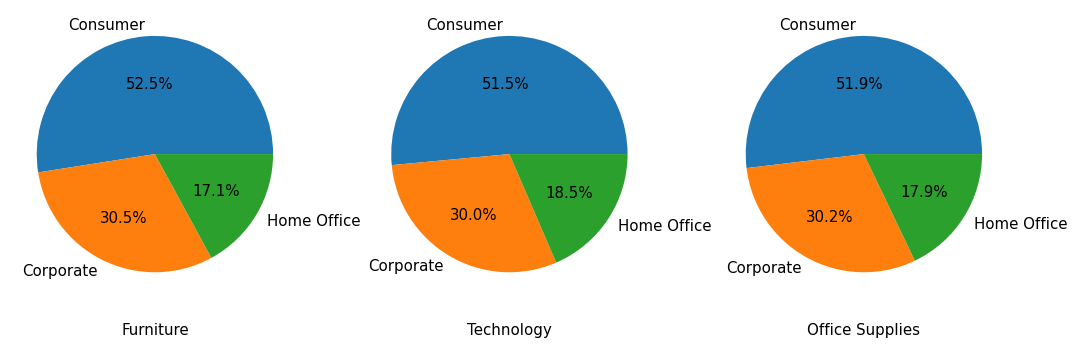

In [17]:
plt.subplot(1,3,1)
df_store[df_store['Category']=='Furniture']['Segment'].value_counts().plot(kind='pie', figsize=(18,18), autopct='%3.1f%%',fontsize=15)
plt.ylabel('')
plt.xlabel('Furniture',fontsize=15, labelpad=20)


plt.subplot(1,3,2)
df_store[df_store['Category']=='Technology']['Segment'].value_counts().plot(kind='pie', figsize=(18,18), autopct='%3.1f%%',fontsize=15)
plt.ylabel('')
plt.xlabel('Technology',fontsize=15, labelpad=20)

plt.subplot(1,3,3)
df_store[df_store['Category']=='Office Supplies']['Segment'].value_counts().plot(kind='pie', figsize=(18,18), autopct='%3.1f%%',fontsize=15)
plt.ylabel('')
plt.xlabel('Office Supplies',fontsize=15, labelpad=20)


Analysis from the above code as well as the pie-chart: 
 - __'Office Supplies'__ are the most purchased product across all buyer segments, followed by Furniture and then Technology products. 
 - __'Consumer'__ segment is the __largest__ purchaser of products across all categories (viz. Office Supplies, Furniture, Technology) followed by 'Corporate'  and __least__ purchase for various products is made by __'Home Office'__.

In [18]:
df_negative_profit.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522


In [19]:
df_negative_profit.groupby(['Category','Sub-Category'])['Profit'].sum()

Category         Sub-Category
Furniture        Bookcases      -12152.2060
                 Chairs          -9880.8413
                 Furnishings     -6490.9134
                 Tables         -32412.1483
Office Supplies  Appliances      -8629.6412
                 Binders        -38510.4964
                 Fasteners         -33.1952
                 Storage         -6426.3038
                 Supplies        -3015.6219
Technology       Accessories      -930.6265
                 Machines       -30118.6682
                 Phones          -7530.6235
Name: Profit, dtype: float64

In [20]:
for i in df_store['Sub-Category'].unique():
    profit=0
    profit=df_store[df_store['Sub-Category']==i].Profit.sum()
    if (profit<0):
        print(i)

Bookcases
Tables
Supplies


In [21]:
for i in df_store['Ship Mode'].unique():
    profit=0
    profit=df_store[df_store['Ship Mode']==i].Profit.sum()
    if (profit<0):
        print(i)

In [22]:
 for i in df_store['Region'].unique():
    profit=0
    profit=df_store[df_store['Region']==i].Profit.sum()
    if (profit<0):
        print(i)
        
# Region, Ship Mode, Segment, Category - all give a null O/P indicating that none have -ve Profit values

In [23]:
for i in df_store['Category'].unique():
    profit=0
    profit=df_store[df_store['Category']==i].Profit.sum()
    if (profit<0):
        print(i)

In [24]:
for i in df_store['State'].unique():
    profit=0
    profit=df_store[df_store['State']==i].Profit.sum()
    if (profit<0):
        print(i)

Florida
North Carolina
Texas
Pennsylvania
Illinois
Arizona
Tennessee
Oregon
Colorado
Ohio


In [26]:
count=0
for i in df_store['City'].unique():
    profit=0
    profit=df_store[df_store['City']==i].Profit.sum()
    if (profit<0):
        count=count+1
        print(i)
        print(profit)
print()
print('Count = ',count)

Fort Lauderdale
-161.3551
Concord
-718.6389000000001
Philadelphia
-13837.767399999999
Houston
-10153.5485
Richardson
-24.4893
Naperville
-146.53239999999997
Troy
-544.1518000000002
Chicago
-6654.5688
Memphis
-1479.0399999999997
Aurora
-2691.7385999999997
Charlotte
-429.78239999999994
Bloomington
-249.35499999999988
Phoenix
-2790.8831999999998
Scottsdale
-89.4879
San Antonio
-7299.0502
Grand Prairie
-85.2311
Hamilton
-9.385000000000002
Akron
-186.6356
Denver
-244.92000000000004
Dallas
-2846.5257
Medina
-1343.0445999999997
Dublin
-349.9295
Tampa
-325.23660000000007
Tamarac
-351.8961
Colorado Springs
-956.6841000000001
Austin
-20.393799999999935
Tucson
-64.9668
Pembroke Pines
-72.4491
Peoria
-127.86629999999997
Miami
-1150.3704000000005
Louisville
-1430.3129000000004
Gastonia
-14.743599999999995
Jacksonville
-2323.835
Park Ridge
-238.45
Amarillo
-387.9683
Parker
-164.1893
Lakeland
-188.63649999999996
Mesa
-559.2314
Laredo
-54.61389999999999
Cleveland
-848.0079000000001
Tyler
-443.7086
Bur

__Identifying the loss facing parameters.__ <br/>
Analysing records with -ve Profit values i.e. records indicating Loss <br/>

1. There are __10 States__ that record __Overall Loss__ in business, indicating that those States are __Loss making areas__. These 10 States are listed below: <br/>
Florida <br/>
North Carolina <br/>
Texas <br/>
Pennsylvania <br/>
Illinois <br/>
Arizona <br/>
Tennessee <br/>
Oregon <br/>
Colorado <br/>
Ohio <br/><br/>

2. There are 3 product __Sub-Categories__ that show -ve Profit i.e there are 3 product Sub-Categories that __incur Loss__. <br/>
The products that incur Loss are:__ <br/>
Bookcases <br/> 
Tables <br/>
Supplies <br/>

3. On analysing the Cities that record -ve Profit we find that: <br/>
    - The 'Super Store' outlets in 116 Cities have recorded loss in business.
    - The Loss in business shown by various cities range from 
    ' -1.1 USD for the outlet in the city of Hickory' to '-13837 USD for the outlet in the city of Philadelphia'   <br/>
    Depending on the business loss recorded by the individual oulets of SuperStore over a given time period, the company needs to decide which loss making outlets need a recovery stratergy and which outlets should be permanently closed.

### Conclusions

### Actionable Insights